In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dfmart=pd.read_csv("C:\\Users\\Legion\\OneDrive\\Desktop\\data\\linear regression\\Dataset-20230627T013852Z-001\\Dataset\\Train.csv")

In [3]:
dfmart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
dfmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
dfmart.drop(["Item_Identifier","Item_Fat_Content",'Item_Visibility','Outlet_Establishment_Year'],axis=1,inplace=True)

In [6]:
dfmart.isna().sum()

Item_Weight             1463
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

In [7]:
dfmart.dtypes

Item_Weight             float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
dtype: object

In [8]:
dfmart["Item_Weight"].mean()

12.857645184135976

In [9]:
np.round(dfmart["Item_Weight"].mean(),3)

12.858

In [10]:
dfmart["Item_Weight"].fillna(np.round(dfmart["Item_Weight"].mean(),3),inplace=True)

In [11]:
dfmart["Item_Weight"].isna().sum()

0

In [12]:
dfmart["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [13]:
dfmart["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
dfmart["Outlet_Size"].mode()[0]

'Medium'

In [15]:
dfmart["Outlet_Size"].replace(np.nan,dfmart["Outlet_Size"].mode()[0],inplace=True)

In [16]:
dfmart["Outlet_Size"].isna().sum()

0

### Outlier Detection using boxplot

<Axes: >

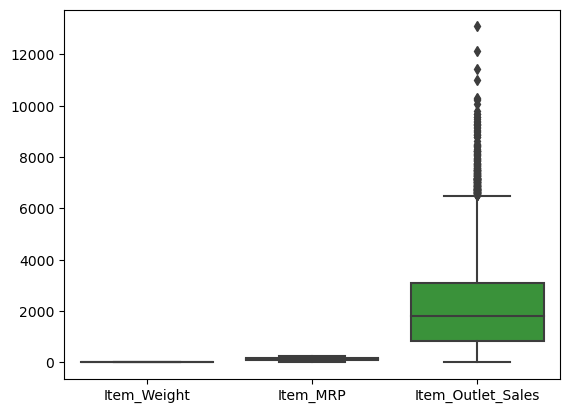

In [17]:
sns.boxplot(dfmart)

<Axes: >

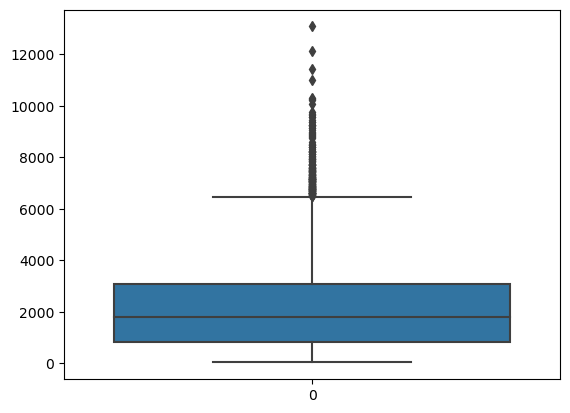

In [18]:
sns.boxplot(dfmart["Item_Outlet_Sales"])

C:\Users\Legion\AppData\Local\Temp\ipykernel_28336\3997163771.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfmart["Item_Outlet_Sales"])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

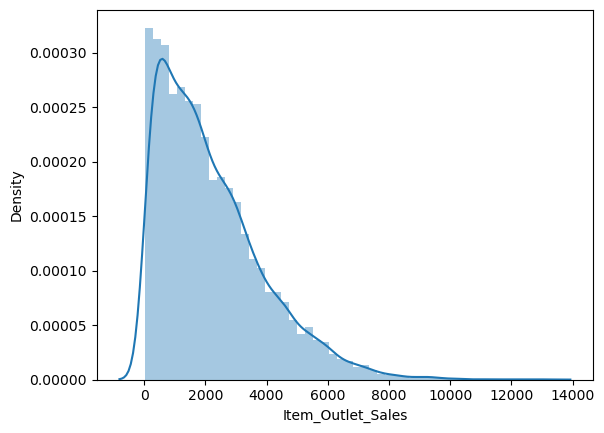

In [19]:
sns.distplot(dfmart["Item_Outlet_Sales"])

### implementing Iqr 

In [20]:
q1=dfmart["Item_Outlet_Sales"].quantile(0.25)

In [21]:
q1

834.2474

In [22]:
q3=dfmart["Item_Outlet_Sales"].quantile(0.75)

In [23]:
q3

3101.2964

In [24]:
IQR=q3-q1

In [25]:
IQR

2267.049

In [26]:
lower=q1-(1.5*IQR)

In [27]:
lower

-2566.3261

In [28]:
upper=q3+(1.5*IQR)

In [29]:
upper

6501.8699

In [30]:
dfmart[dfmart["Item_Outlet_Sales"]<lower]

,Item_Weight,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [31]:
dfmart[dfmart["Item_Outlet_Sales"]>upper]

,Item_Weight,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,21.350,Canned,259.9278,OUT018,Medium,Tier 3,Supermarket Type2,6768.5228
130,12.858,Canned,180.5976,OUT027,Medium,Tier 3,Supermarket Type3,7968.2944
132,12.858,Health and Hygiene,224.4404,OUT027,Medium,Tier 3,Supermarket Type3,6976.2524
145,18.600,Frozen Foods,246.3802,OUT049,Medium,Tier 1,Supermarket Type1,7370.4060
203,12.858,Baking Goods,177.9370,OUT027,Medium,Tier 3,Supermarket Type3,6704.6060
...,...,...,...,...,...,...,...,...
8245,16.200,Fruits and Vegetables,260.3278,OUT049,Medium,Tier 1,Supermarket Type1,7549.5062
8329,12.858,Household,253.6014,OUT027,Medium,Tier 3,Supermarket Type3,6630.0364
8350,10.000,Household,248.3750,OUT035,Small,Tier 2,Supermarket Type1,7240.5750
8447,20.350,Dairy,261.6594,OUT017,Medium,Tier 2,Supermarket Type1,7588.1226


In [32]:
dfmart[(dfmart["Item_Outlet_Sales"]<lower)|(dfmart["Item_Outlet_Sales"]>upper)]

,Item_Weight,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,21.350,Canned,259.9278,OUT018,Medium,Tier 3,Supermarket Type2,6768.5228
130,12.858,Canned,180.5976,OUT027,Medium,Tier 3,Supermarket Type3,7968.2944
132,12.858,Health and Hygiene,224.4404,OUT027,Medium,Tier 3,Supermarket Type3,6976.2524
145,18.600,Frozen Foods,246.3802,OUT049,Medium,Tier 1,Supermarket Type1,7370.4060
203,12.858,Baking Goods,177.9370,OUT027,Medium,Tier 3,Supermarket Type3,6704.6060
...,...,...,...,...,...,...,...,...
8245,16.200,Fruits and Vegetables,260.3278,OUT049,Medium,Tier 1,Supermarket Type1,7549.5062
8329,12.858,Household,253.6014,OUT027,Medium,Tier 3,Supermarket Type3,6630.0364
8350,10.000,Household,248.3750,OUT035,Small,Tier 2,Supermarket Type1,7240.5750
8447,20.350,Dairy,261.6594,OUT017,Medium,Tier 2,Supermarket Type1,7588.1226


In [33]:
dfmart[(dfmart["Item_Outlet_Sales"]>=lower)&(dfmart["Item_Outlet_Sales"]<=upper)]

,Item_Weight,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...
8518,6.865,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976


In [34]:
dfmart=dfmart[(dfmart["Item_Outlet_Sales"]>=lower)&(dfmart["Item_Outlet_Sales"]<=upper)]

In [35]:
dfmart

,Item_Weight,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...
8518,6.865,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976


### Encoding 

In [36]:
dfmart.dtypes

Item_Weight             float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
dtype: object

In [37]:
dfmart.columns

Index(['Item_Weight', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [38]:
dfmart["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [39]:
from sklearn.preprocessing import OrdinalEncoder

In [40]:
ord=OrdinalEncoder()

In [41]:
ord

OrdinalEncoder()

In [42]:
ary1=ord.fit_transform(dfmart[["Outlet_Type"]])

In [43]:
ary1

array([[1.],
       [2.],
       [1.],
       ...,
       [1.],
       [2.],
       [1.]])

In [44]:
ord.categories_

[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3'], dtype=object)]

In [45]:
dfmart["Outlet_Type"]=ary1

C:\Users\Legion\AppData\Local\Temp\ipykernel_28336\894595930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmart["Outlet_Type"]=ary1


In [46]:
dfmart

,Item_Weight,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Dairy,249.8092,OUT049,Medium,Tier 1,1.0,3735.1380
1,5.920,Soft Drinks,48.2692,OUT018,Medium,Tier 3,2.0,443.4228
2,17.500,Meat,141.6180,OUT049,Medium,Tier 1,1.0,2097.2700
3,19.200,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,0.0,732.3800
4,8.930,Household,53.8614,OUT013,High,Tier 3,1.0,994.7052
...,...,...,...,...,...,...,...,...
8518,6.865,Snack Foods,214.5218,OUT013,High,Tier 3,1.0,2778.3834
8519,8.380,Baking Goods,108.1570,OUT045,Medium,Tier 2,1.0,549.2850
8520,10.600,Health and Hygiene,85.1224,OUT035,Small,Tier 2,1.0,1193.1136
8521,7.210,Snack Foods,103.1332,OUT018,Medium,Tier 3,2.0,1845.5976


In [47]:
ord1=OrdinalEncoder()

In [48]:
ord1

OrdinalEncoder()

In [49]:
ord1.fit_transform(dfmart[["Outlet_Location_Type"]])

array([[0.],
       [2.],
       [0.],
       ...,
       [1.],
       [2.],
       [0.]])

In [50]:
dfmart["Outlet_Location_Type"]=ord1.fit_transform(dfmart[["Outlet_Location_Type"]])

C:\Users\Legion\AppData\Local\Temp\ipykernel_28336\3267761889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmart["Outlet_Location_Type"]=ord1.fit_transform(dfmart[["Outlet_Location_Type"]])


In [51]:
ord2=OrdinalEncoder()

In [52]:
ord2.fit_transform(dfmart[["Outlet_Size"]])

array([[1.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [53]:
dfmart["Outlet_Size"]=ord2.fit_transform(dfmart[["Outlet_Size"]])

C:\Users\Legion\AppData\Local\Temp\ipykernel_28336\273732385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmart["Outlet_Size"]=ord2.fit_transform(dfmart[["Outlet_Size"]])


In [54]:
dfmart

,Item_Weight,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Dairy,249.8092,OUT049,1.0,0.0,1.0,3735.1380
1,5.920,Soft Drinks,48.2692,OUT018,1.0,2.0,2.0,443.4228
2,17.500,Meat,141.6180,OUT049,1.0,0.0,1.0,2097.2700
3,19.200,Fruits and Vegetables,182.0950,OUT010,1.0,2.0,0.0,732.3800
4,8.930,Household,53.8614,OUT013,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...
8518,6.865,Snack Foods,214.5218,OUT013,0.0,2.0,1.0,2778.3834
8519,8.380,Baking Goods,108.1570,OUT045,1.0,1.0,1.0,549.2850
8520,10.600,Health and Hygiene,85.1224,OUT035,2.0,1.0,1.0,1193.1136
8521,7.210,Snack Foods,103.1332,OUT018,1.0,2.0,2.0,1845.5976


In [55]:
pd.get_dummies(dfmart)

,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,249.8092,1.0,0.0,1.0,3735.1380,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,48.2692,1.0,2.0,2.0,443.4228,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,141.6180,1.0,0.0,1.0,2097.2700,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,182.0950,1.0,2.0,0.0,732.3800,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,53.8614,0.0,2.0,1.0,994.7052,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,214.5218,0.0,2.0,1.0,2778.3834,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,108.1570,1.0,1.0,1.0,549.2850,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,85.1224,2.0,1.0,1.0,1193.1136,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,103.1332,1.0,2.0,2.0,1845.5976,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [56]:
dfmart=pd.get_dummies(dfmart)

In [57]:
dfmart

,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,249.8092,1.0,0.0,1.0,3735.1380,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,48.2692,1.0,2.0,2.0,443.4228,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,141.6180,1.0,0.0,1.0,2097.2700,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,182.0950,1.0,2.0,0.0,732.3800,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,53.8614,0.0,2.0,1.0,994.7052,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,214.5218,0.0,2.0,1.0,2778.3834,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,108.1570,1.0,1.0,1.0,549.2850,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,85.1224,2.0,1.0,1.0,1193.1136,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,103.1332,1.0,2.0,2.0,1845.5976,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
X=dfmart.drop("Item_Outlet_Sales",axis=1)

In [59]:
X

,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,249.8092,1.0,0.0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.920,48.2692,1.0,2.0,2.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,141.6180,1.0,0.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,182.0950,1.0,2.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,53.8614,0.0,2.0,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,214.5218,0.0,2.0,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,108.1570,1.0,1.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,85.1224,2.0,1.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,103.1332,1.0,2.0,2.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [60]:
y=dfmart["Item_Outlet_Sales"]

In [61]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8337, dtype: float64

splitting

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [64]:
X.shape,y.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8337, 31), (8337,), (6669, 31), (1668, 31), (6669,), (1668,))

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
std=StandardScaler()

In [67]:
std.fit(X_train)

StandardScaler()

In [68]:
std_X_train=std.transform(X_train)

In [69]:
std_X_train

array([[-0.62535215, -0.42224347, -0.28433273, ..., -0.3495147 ,
        -0.35408994, -0.3511333 ],
       [-1.32446002,  0.93619635, -0.28433273, ..., -0.3495147 ,
        -0.35408994, -0.3511333 ],
       [ 0.92284113, -1.69409087, -0.28433273, ..., -0.3495147 ,
        -0.35408994, -0.3511333 ],
       ...,
       [ 0.92284113,  1.87673472,  1.36742247, ..., -0.3495147 ,
         2.82414127, -0.3511333 ],
       [-0.55331569,  1.2484259 ,  1.36742247, ..., -0.3495147 ,
        -0.35408994, -0.3511333 ],
       [ 0.00360876, -1.24756697,  1.36742247, ..., -0.3495147 ,
        -0.35408994, -0.3511333 ]])

In [70]:
std_X_test=std.transform(X_test)

In [71]:
std_X_test

array([[-0.16361029,  0.77430701,  1.36742247, ..., -0.3495147 ,
        -0.35408994, -0.3511333 ],
       [ 1.85577225,  1.19537536, -0.28433273, ..., -0.3495147 ,
        -0.35408994,  2.8479213 ],
       [ 0.5685635 ,  1.22190063, -0.28433273, ...,  2.86111   ,
        -0.35408994, -0.3511333 ],
       ...,
       [-1.23825246,  0.51675371, -0.28433273, ...,  2.86111   ,
        -0.35408994, -0.3511333 ],
       [ 0.00360876, -1.54469357,  1.36742247, ..., -0.3495147 ,
        -0.35408994, -0.3511333 ],
       [ 0.8283671 , -0.20413669, -0.28433273, ...,  2.86111   ,
        -0.35408994, -0.3511333 ]])

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lreg=LinearRegression()

In [74]:
lreg.fit(std_X_train,y_train)

LinearRegression()

In [75]:
lreg.score(std_X_test,y_test)

0.5431303606897289

In [76]:
pip install xgboost

In [77]:
from xgboost import XGBRegressor

In [78]:
xgr=XGBRegressor()

In [79]:
xgr.fit(std_X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [80]:
xgr.score(std_X_test,y_test)

0.48189321639372995

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
rfr=RandomForestRegressor()

In [83]:
rfr.fit(std_X_train,y_train)

RandomForestRegressor()

In [84]:
rfr.score(std_X_test,y_test)

0.49877454347768735

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRFRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
dtree1=DecisionTreeRegressor()
svm1=SVR()
xgb1=XGBRFRegressor()
lreg1=LinearRegression()
rfr1=RandomForestRegressor()
ada1=AdaBoostRegressor()
grad=GradientBoostingRegressor()
clist=[dtree1,svm1,xgb1,lreg1,rfr1,ada1,grad]
clist

[DecisionTreeRegressor(),
 SVR(),
 XGBRFRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='reg:squarederror', predictor=None, random_state=None,
                reg_alpha=None, ...),
 LinearRegression(),
 RandomForestRegressor(),
 AdaBoostRegressor(),
 GradientBoostingRegressor()]

In [86]:
import time 
for i in clist:
    print(i,end="==>|")
    i.fit(std_X_train,y_train)
    m=i.score(std_X_test,y_test)
    print(m)
    time.sleep(1)

DecisionTreeRegressor()==>|0.09533920076908098
SVR()==>|0.03714188387372064
XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)==>|0.5750126806531872
LinearRegression()==>|0.5431303606897289
RandomForestRegressor()==>|0.4899331901159518
AdaBoostRegressor()==>|0.534940539

In [87]:
rlist=[]
for i in range(0,100):
    print("Random_state=",i)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=i)
    for j in clist:
        print(j,end="==>")
        j.fit(std_X_train,y_train)
        s=j.score(std_X_test,y_test)
        print(s)
        rlist.append(s)
    print(rlist)
    print("-------------------------------------------------------------------------")
    print("max=",max(rlist))
    rlist.index(max(rlist))
    print("max_index",rlist.index(max(rlist)))
    print("--------------------------------------------------------------------------------")  
      

Random_state= 0
DecisionTreeRegressor()==>-1.063622016730176
SVR()==>-0.05548632865159364
XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)==>-0.018116009398088107
LinearRegression()==>-0.00454798477560181
RandomForestRegressor()==>-0.16361532408177815
AdaBoostRegresso